<a href="https://colab.research.google.com/github/Ciscom224/projet_ML/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
data=pd.read_csv('/content/ttitanic.csv')

In [ ]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [149]:
dt=data.copy()

## Analyse de Forme

In [ ]:
dt.shape

(1310, 14)

In [ ]:
dt.dtypes.value_counts()

float64    7
object     7
dtype: int64

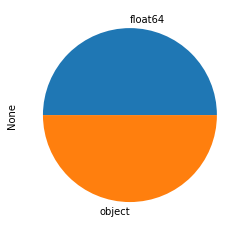

In [ ]:
dt.dtypes.value_counts().plot.pie()



###Visualisation des variables manquantes



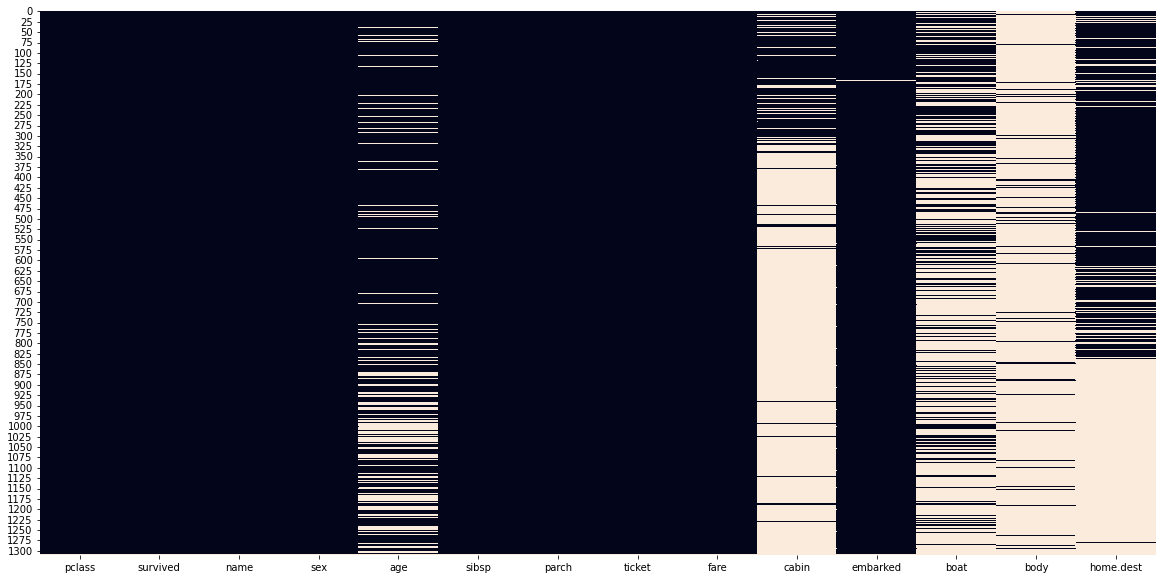

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dt.isna(),cbar=False)

In [ ]:
(dt.isna().sum()/dt.shape[0]).sort_values()

pclass       0.000763
survived     0.000763
name         0.000763
sex          0.000763
sibsp        0.000763
parch        0.000763
ticket       0.000763
fare         0.001527
embarked     0.002290
age          0.201527
home.dest    0.431298
boat         0.629008
cabin        0.774809
body         0.907634
dtype: float64

## Analyse du Fond

###Elimination des colonnes

In [ ]:
dt=dt.columns[(dt.isna().sum()/dt.shape[0])< 0.95]

In [4]:
dt.drop(columns=['ticket','name'],axis=1,inplace=True)

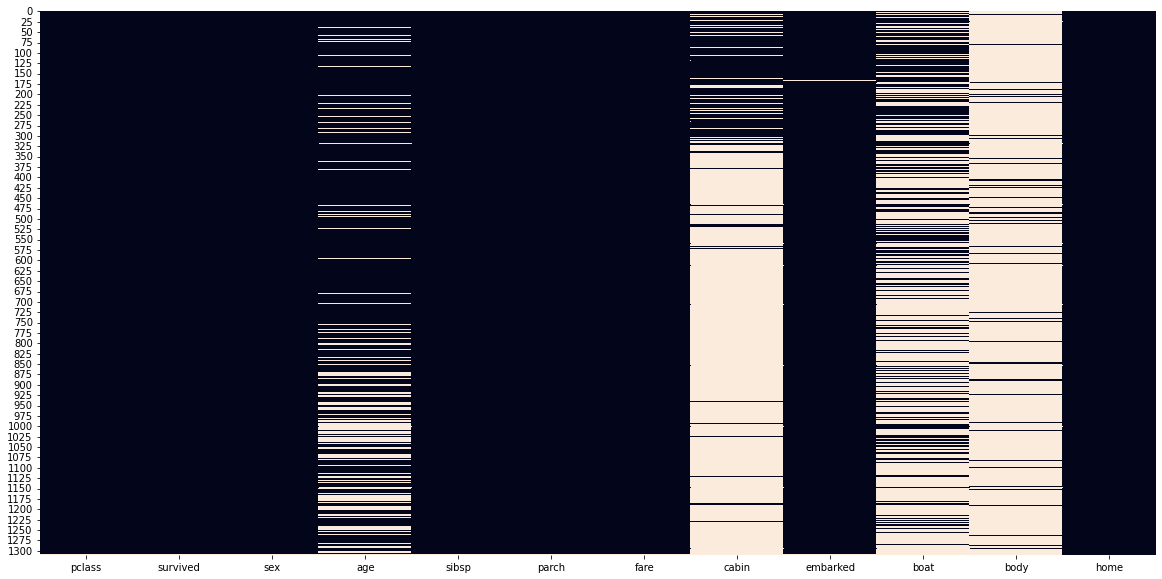

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dt.isna(),cbar=False)

###Visualisation du target

In [ ]:
dt['survived'].value_counts(normalize=True)

0.0    0.618029
1.0    0.381971
Name: survived, dtype: float64

###Histogramme des variables continue(float)

<Figure size 1440x720 with 0 Axes>

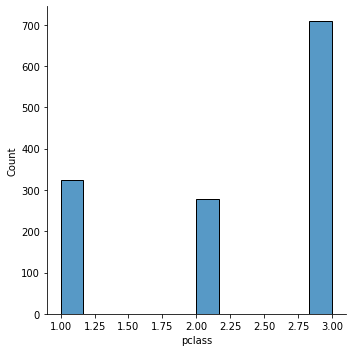

<Figure size 1440x720 with 0 Axes>

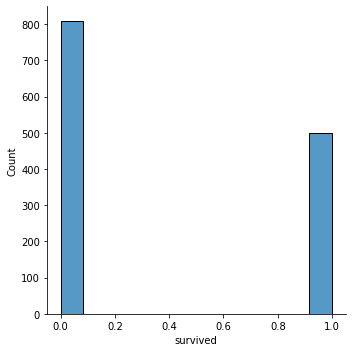

<Figure size 1440x720 with 0 Axes>

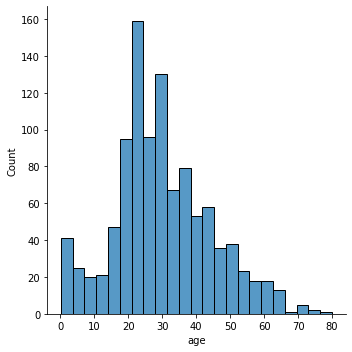

<Figure size 1440x720 with 0 Axes>

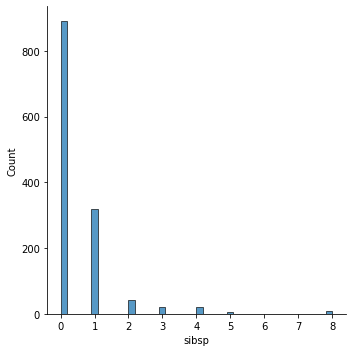

<Figure size 1440x720 with 0 Axes>

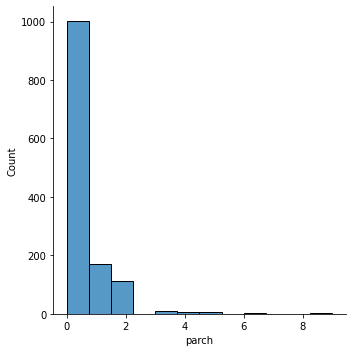

<Figure size 1440x720 with 0 Axes>

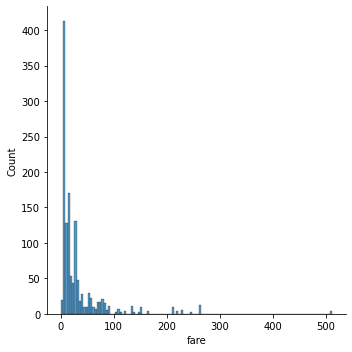

<Figure size 1440x720 with 0 Axes>

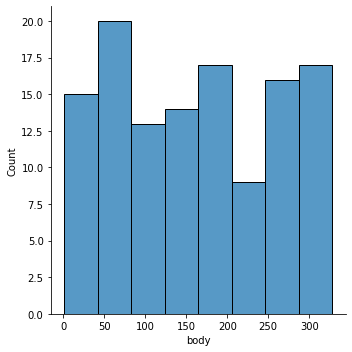

In [ ]:
for col in dt.select_dtypes('float'):
  plt.figure(figsize=(20,10))
  sns.displot(dt[col],legend=True)

### Variables Qualitatives

In [ ]:
for col in dt.select_dtypes('object'):
  print(f'{col:-<50}{dt[col].unique()}')

sex-----------------------------------------------['female' 'male' nan]
cabin---------------------------------------------['B5' 'C22 C26' 'E12' 'D7' 'A36' 'C101' nan 'C62 C64' 'B35' 'A23'
 'B58 B60' 'D15' 'C6' 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7'
 'C103' 'D22' 'E33' 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51 B53 B55'
 'B96 B98' 'C46' 'E31' 'E8' 'B61' 'B77' 'A9' 'C89' 'A14' 'E58' 'E49' 'E52'
 'E45' 'B22' 'B26' 'C85' 'E17' 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18'
 'C54' 'C45' 'D20' 'A29' 'C95' 'E25' 'C111' 'C23 C25 C27' 'E36' 'D34'
 'D40' 'B39' 'B41' 'B102' 'C123' 'E63' 'C130' 'B86' 'C92' 'A5' 'C51' 'B42'
 'C91' 'C125' 'D10 D12' 'B82 B84' 'E50' 'D33' 'C83' 'B94' 'D49' 'D45'
 'B69' 'B11' 'E46' 'C39' 'B18' 'D11' 'C93' 'B28' 'C49' 'B52 B54 B56' 'E60'
 'C132' 'B37' 'D21' 'D19' 'C124' 'D17' 'B101' 'D28' 'D6' 'D9' 'B80' 'C106'
 'B79' 'C47' 'D30' 'C90' 'E38' 'C78' 'C30' 'C118' 'D36' 'D48' 'D47' 'C105'
 'B36' 'B30' 'D43' 'B24' 'C2' 'C65' 'B73' 'C104' 'C110' 'C50' 'B3' 'A24'
 'A32' '

In [5]:
def get_home(adresse):
  if(len(str(adresse))>3):
    return adresse.split("/")[0].strip()
  else:
    return '...'

In [6]:
dt['home']=dt['home.dest'].apply(get_home)

In [7]:
dt.drop(columns='home.dest',inplace=True)

In [8]:
dt.drop(columns='home',inplace=True)

In [ ]:
dt.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ"


In [ ]:
for col in dt.select_dtypes('object'):
  print(f'{col:-<50}{dt[col].unique()}')

sex-----------------------------------------------['female' 'male' nan]
cabin---------------------------------------------['B5' 'C22 C26' 'E12' 'D7' 'A36' 'C101' nan 'C62 C64' 'B35' 'A23'
 'B58 B60' 'D15' 'C6' 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7'
 'C103' 'D22' 'E33' 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51 B53 B55'
 'B96 B98' 'C46' 'E31' 'E8' 'B61' 'B77' 'A9' 'C89' 'A14' 'E58' 'E49' 'E52'
 'E45' 'B22' 'B26' 'C85' 'E17' 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18'
 'C54' 'C45' 'D20' 'A29' 'C95' 'E25' 'C111' 'C23 C25 C27' 'E36' 'D34'
 'D40' 'B39' 'B41' 'B102' 'C123' 'E63' 'C130' 'B86' 'C92' 'A5' 'C51' 'B42'
 'C91' 'C125' 'D10 D12' 'B82 B84' 'E50' 'D33' 'C83' 'B94' 'D49' 'D45'
 'B69' 'B11' 'E46' 'C39' 'B18' 'D11' 'C93' 'B28' 'C49' 'B52 B54 B56' 'E60'
 'C132' 'B37' 'D21' 'D19' 'C124' 'D17' 'B101' 'D28' 'D6' 'D9' 'B80' 'C106'
 'B79' 'C47' 'D30' 'C90' 'E38' 'C78' 'C30' 'C118' 'D36' 'D48' 'D47' 'C105'
 'B36' 'B30' 'D43' 'B24' 'C2' 'C65' 'B73' 'C104' 'C110' 'C50' 'B3' 'A24'
 'A32' '

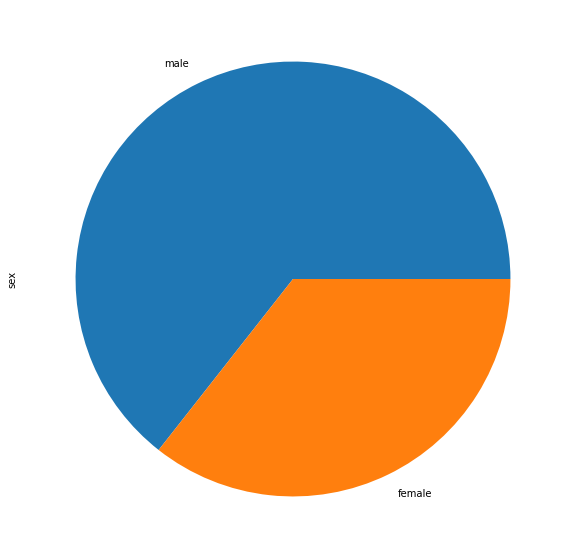

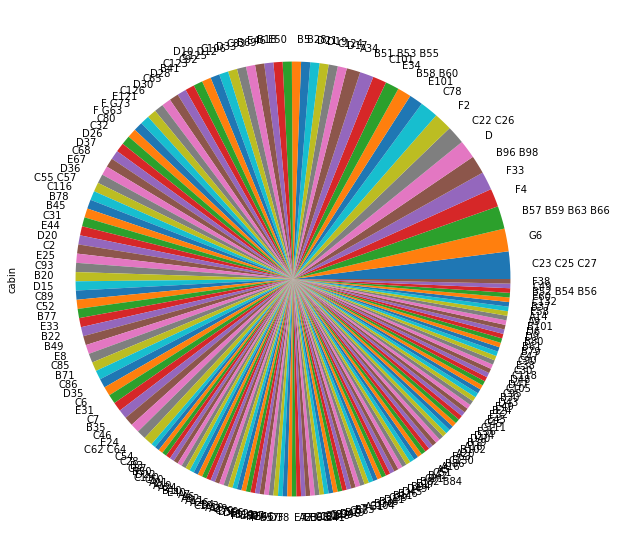

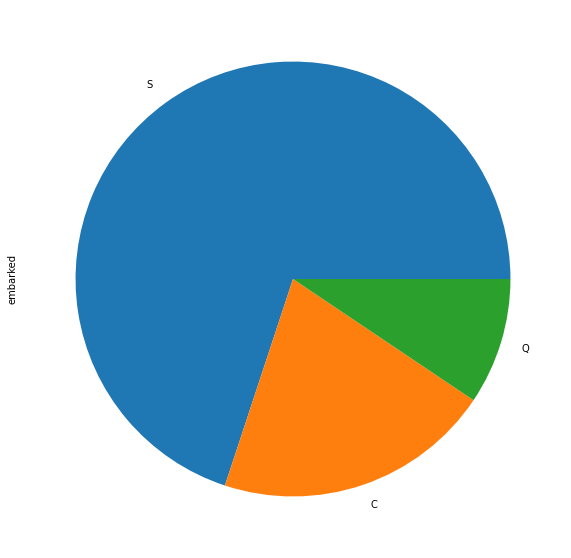

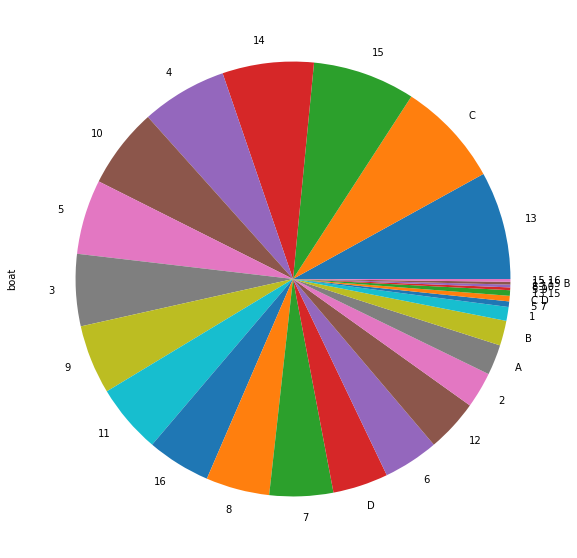

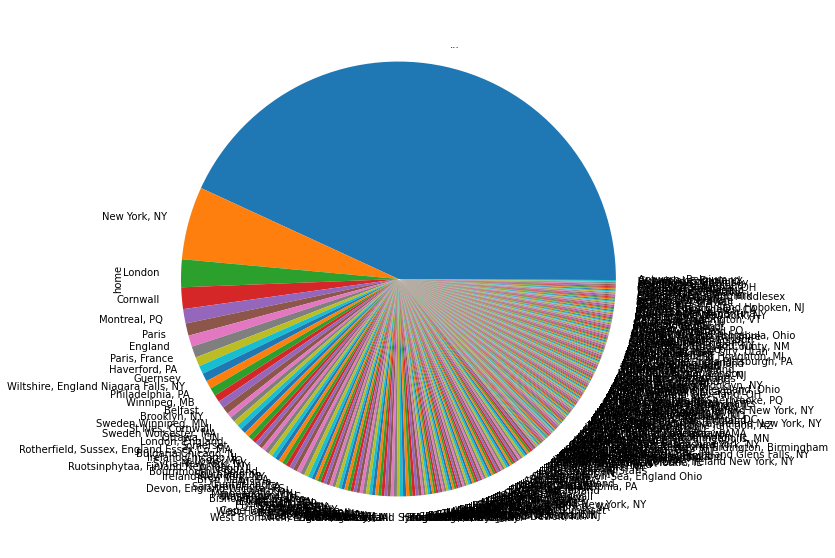

In [ ]:
for col in dt.select_dtypes('object'):
  plt.figure(figsize=(20,10))
  dt[col].value_counts().plot.pie()

##Relation Target et Variable

In [ ]:
dt_survived=dt[dt['survived']==1]

In [ ]:
dt_survived.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ"
5,1.0,1.0,male,48.0000,0.0,0.0,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,female,63.0000,1.0,0.0,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1.0,1.0,female,53.0000,2.0,0.0,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


In [ ]:
dt_unsurvived=dt[dt['survived']==0]

In [ ]:
dt_unsurvived.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home
2,1.0,0.0,female,2.0,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ"
3,1.0,0.0,male,30.0,1.0,2.0,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ"
4,1.0,0.0,female,25.0,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ"
7,1.0,0.0,male,39.0,0.0,0.0,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1.0,0.0,male,71.0,0.0,0.0,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


### Target et les survivants

#### Survivants/non survivants

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

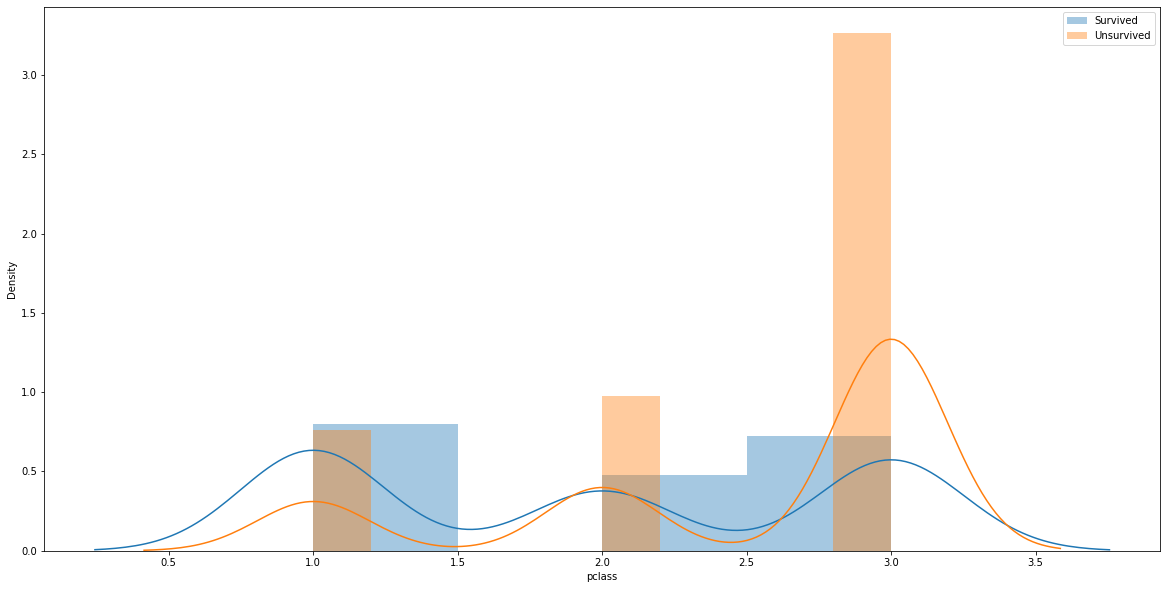

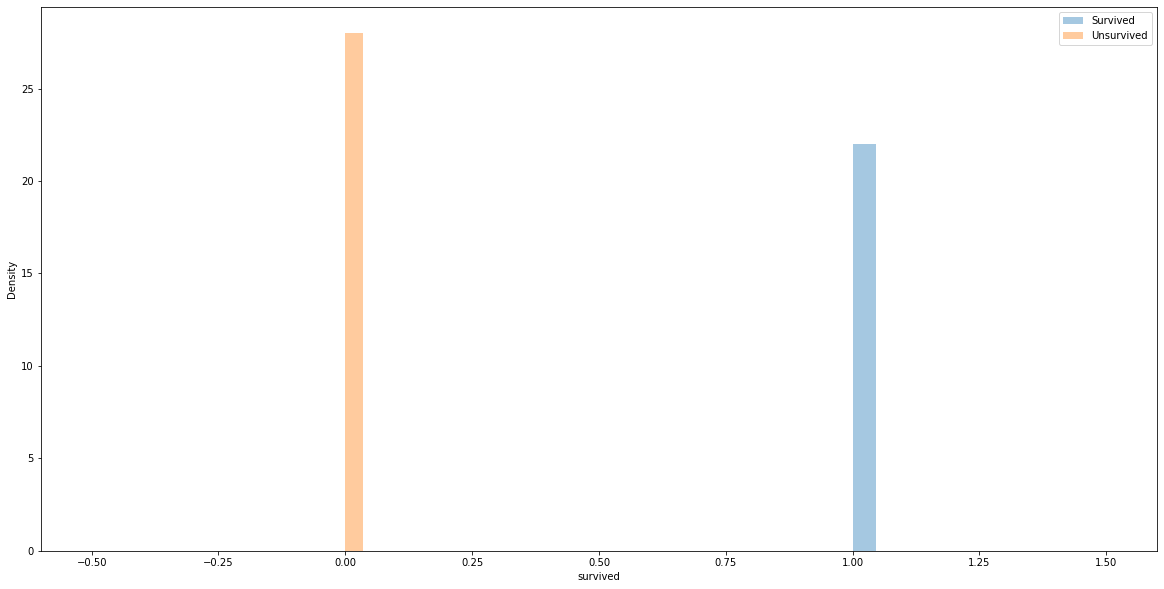

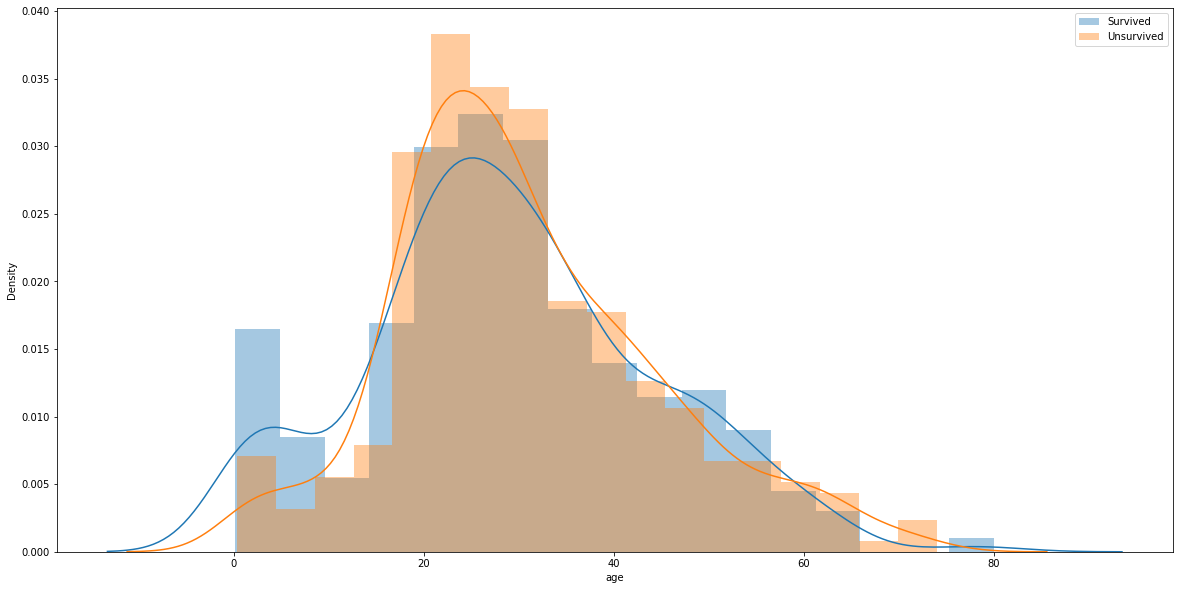

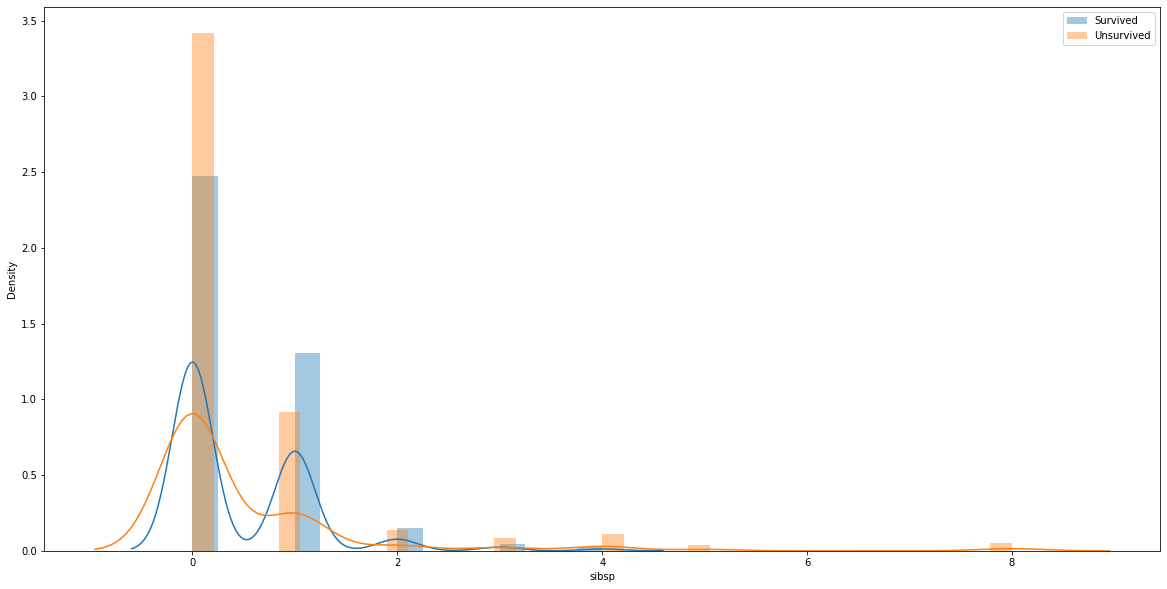

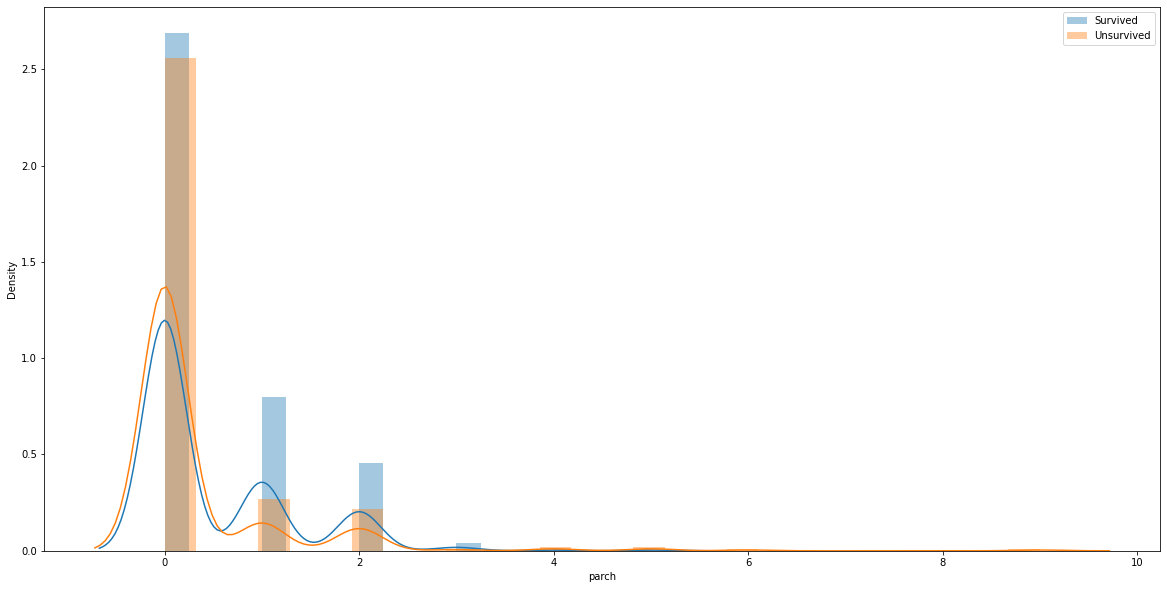

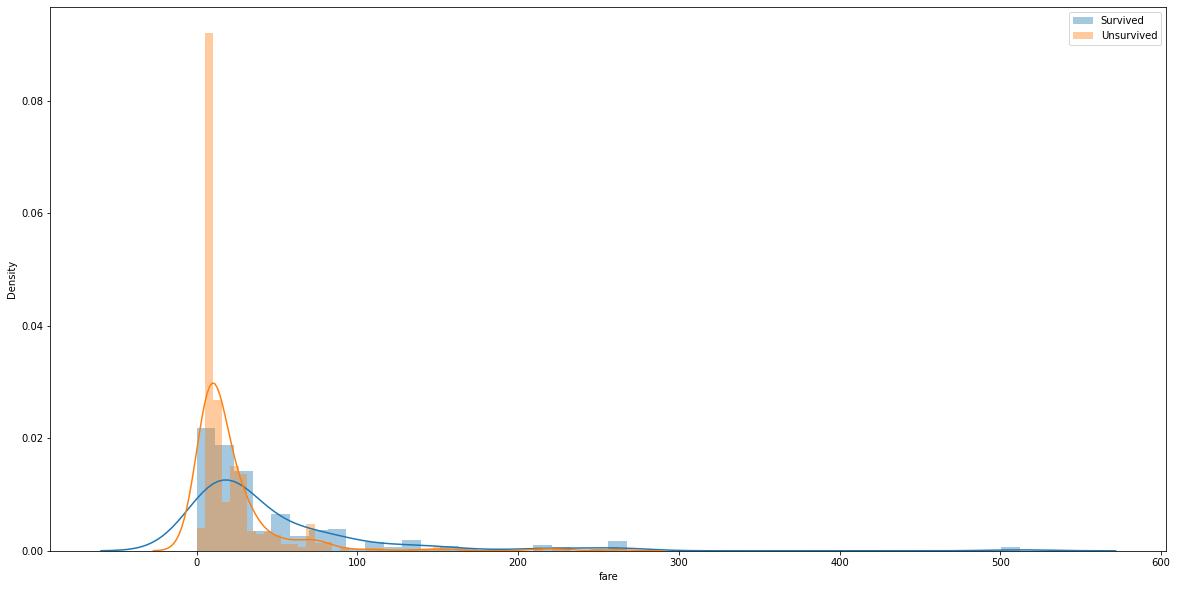

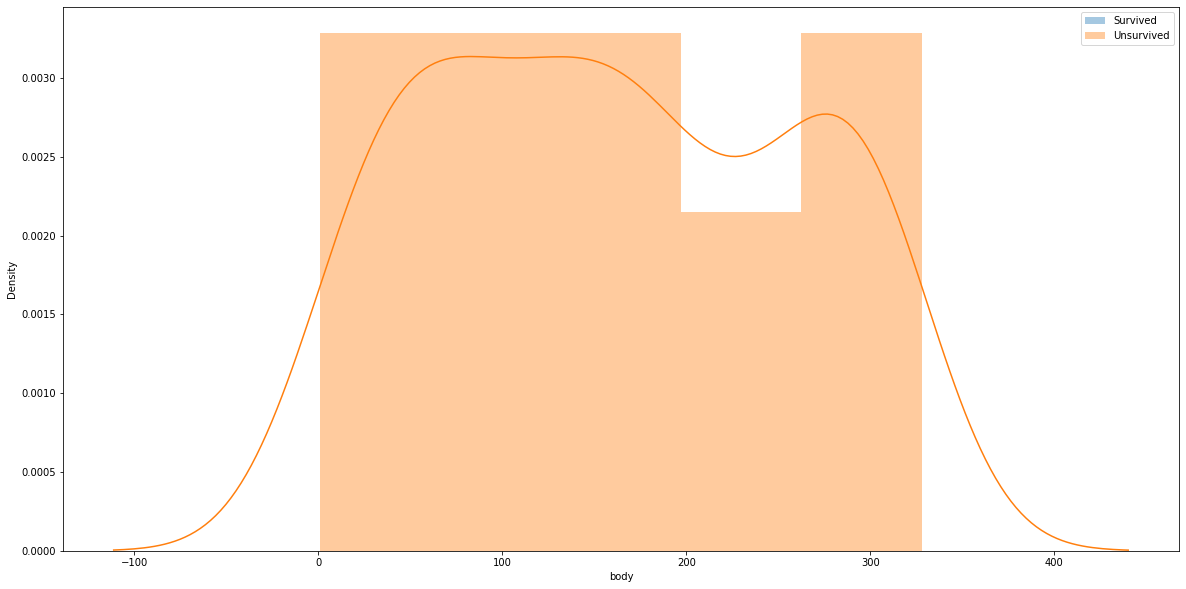

In [ ]:
for col in dt.select_dtypes('float'):
  plt.figure(figsize=(20,10))
  sns.distplot(dt_survived[col],label="Survived")
  sns.distplot(dt_unsurvived[col],label="Unsurvived")
  plt.legend()

#### Target/Age

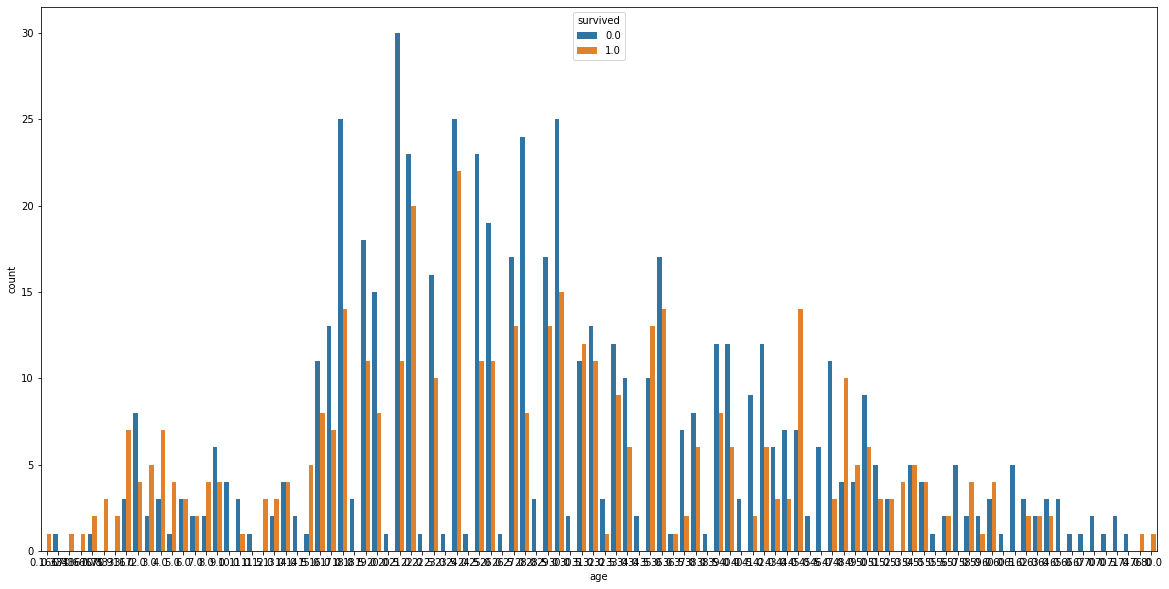

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='age',hue='survived',data=dt)

#### Target / Variables qualitatives

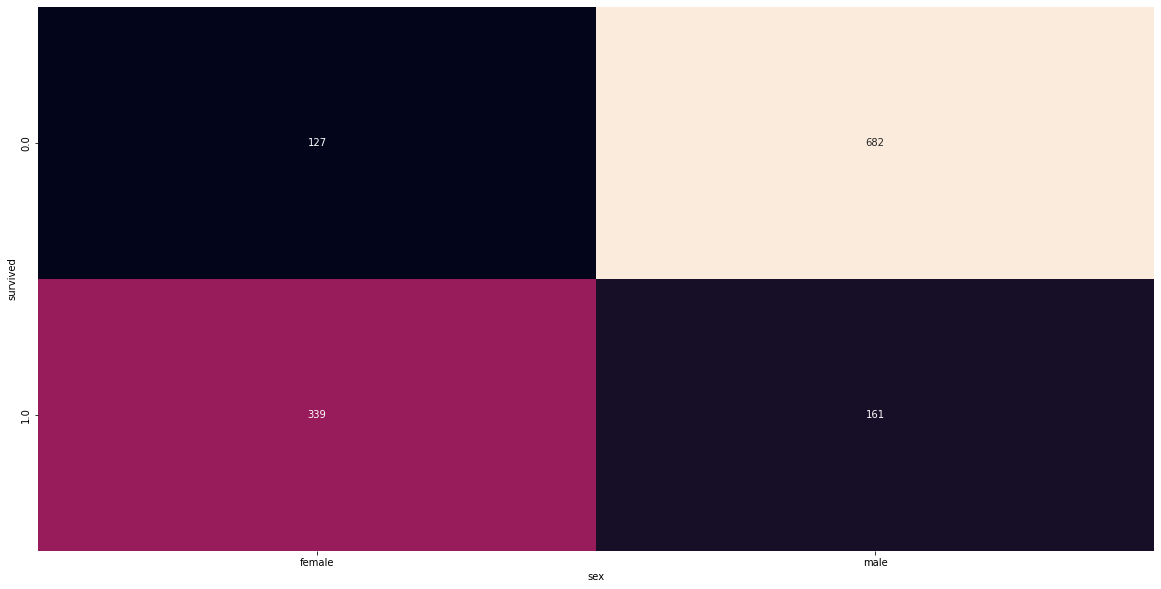

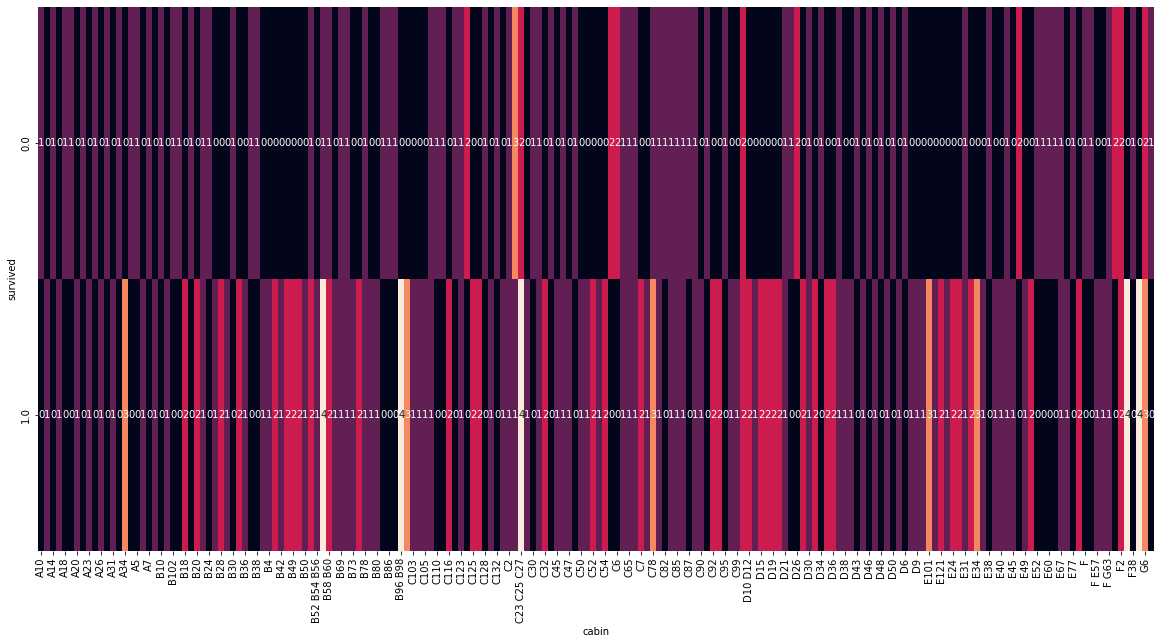

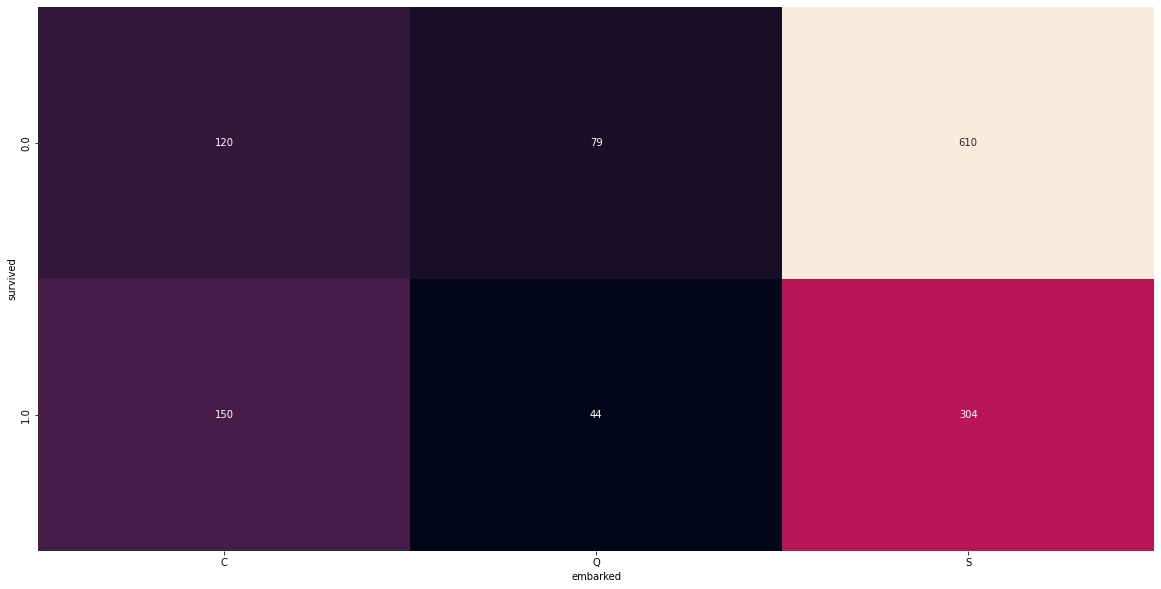

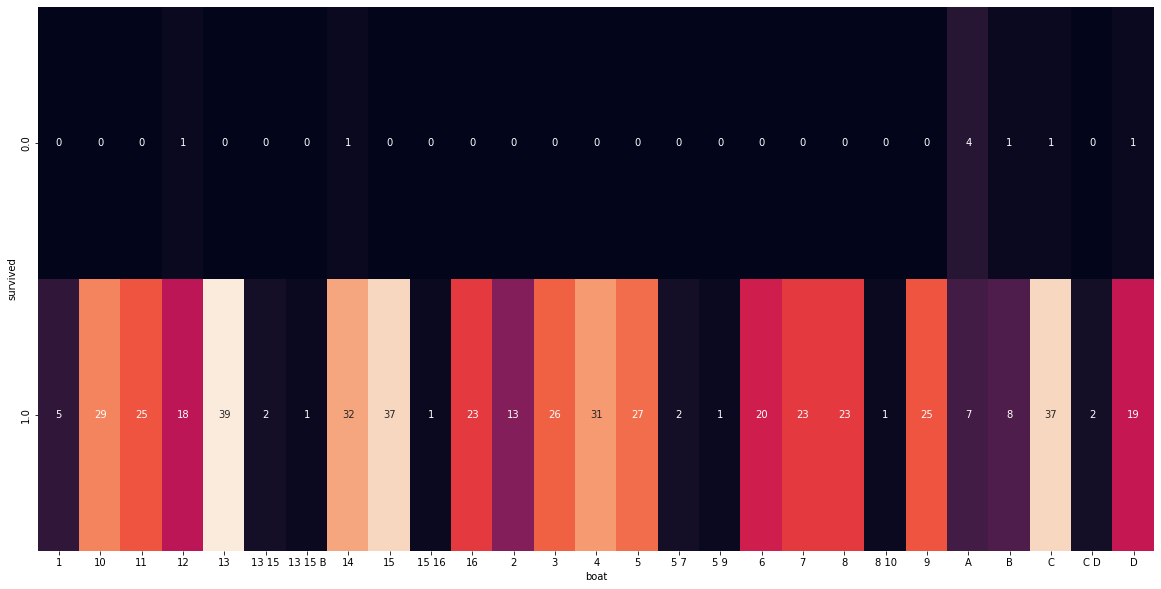

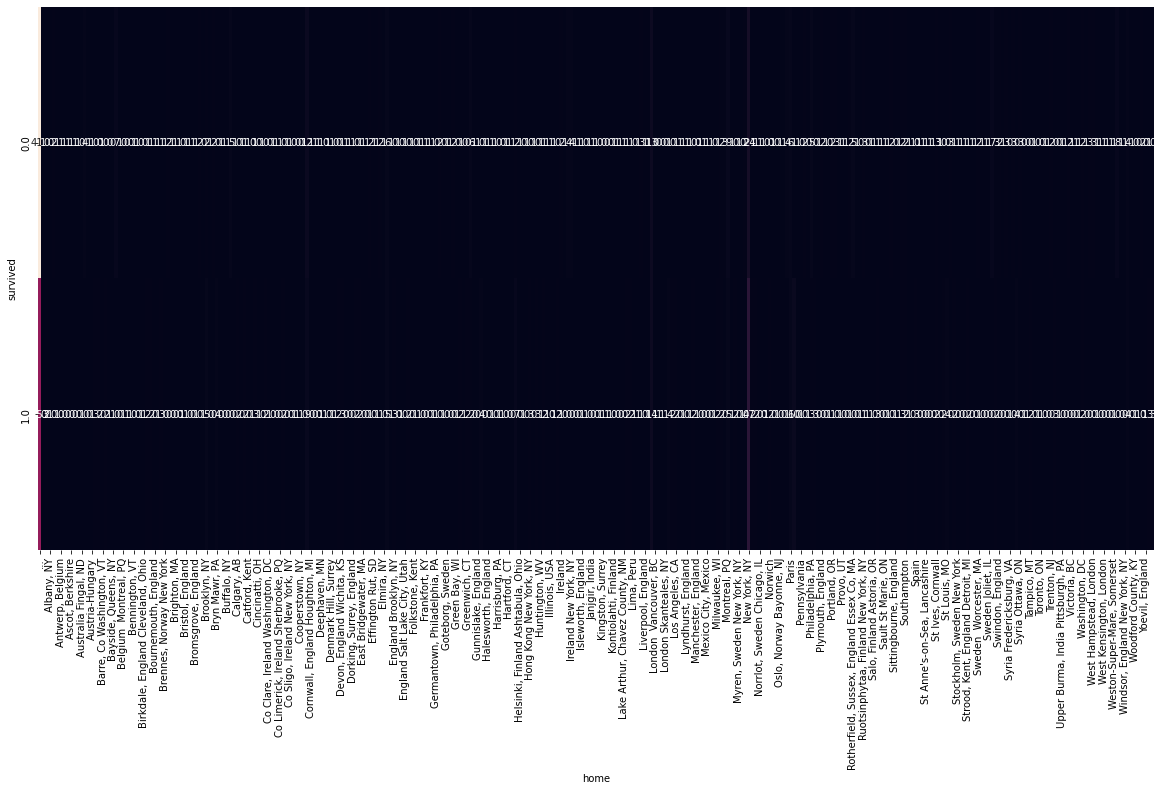

In [ ]:
for col in dt.select_dtypes('object'):
  plt.figure(figsize=(20,10))
  sns.heatmap(pd.crosstab(dt['survived'],dt[col]),annot=True,fmt='d',cbar=False)

### Relation variables / Variables

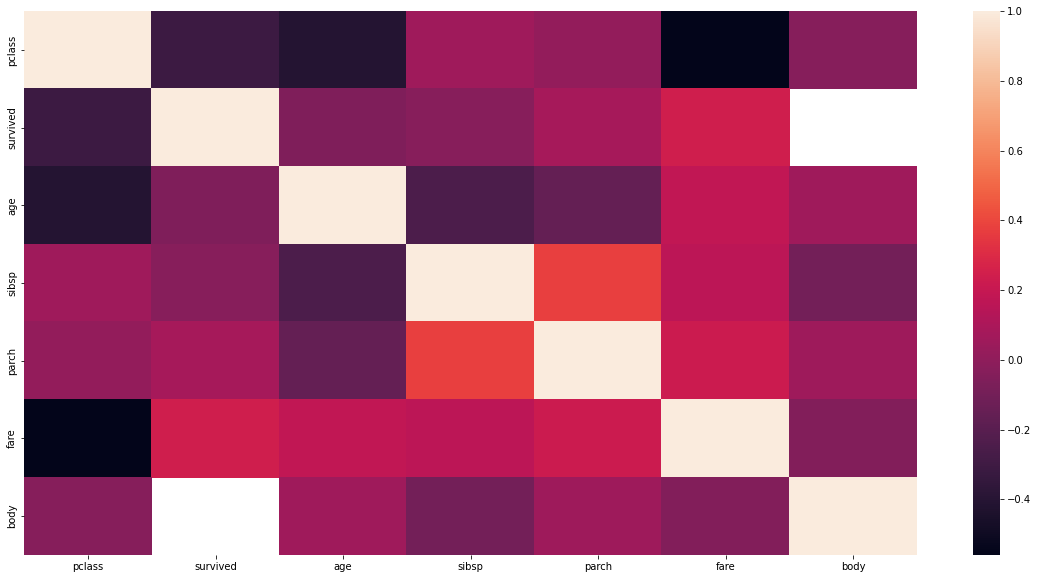

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dt.corr())

<Figure size 1440x720 with 0 Axes>

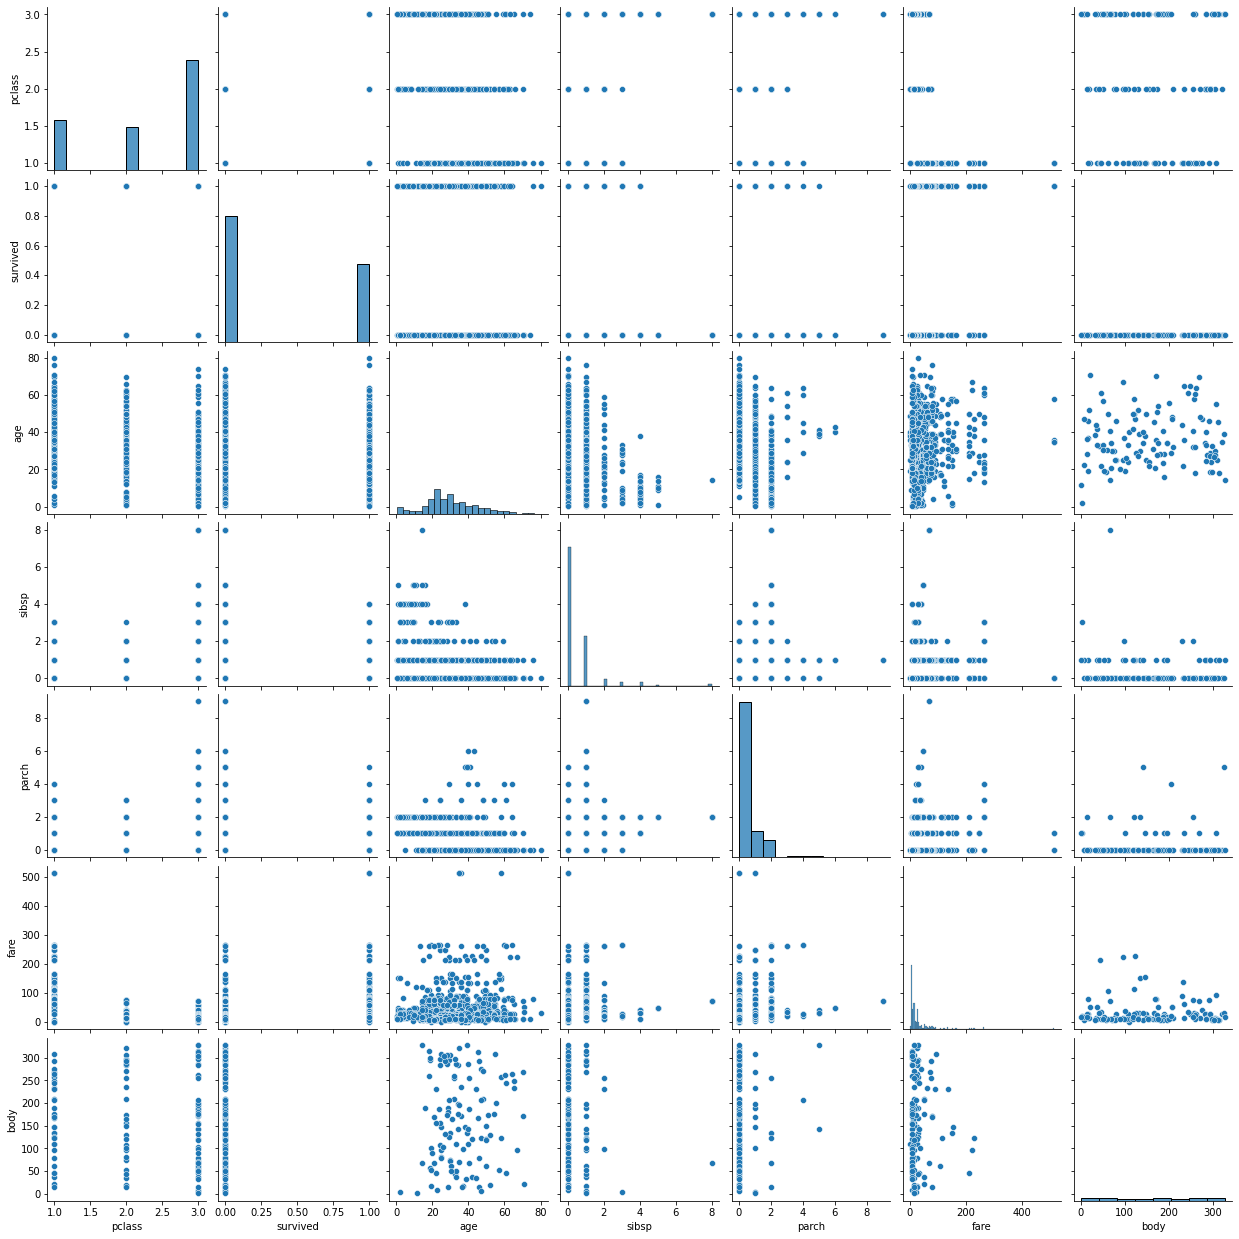

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(dt)

## Influence des valeurs manquantes sur la data

In [ ]:
dt.dropna().count()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
boat        0
body        0
home        0
dtype: int64

# PRÉ-TRAITEMENT DE DONNÉES

In [ ]:
dt=data.copy()

In [ ]:
dt.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ"
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ"
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ"
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ"


##TrainTest/ Nettoyage,Encodage

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=dt.drop(columns='survived',axis=1)
y=dt['survived']

In [ ]:
X.shape

(1310, 10)

In [ ]:
X.shape

(1310, 10)

In [ ]:
y.shape

(1310,)

### Selection de colonnes

In [11]:
from sklearn.compose import make_column_selector,make_column_transformer

In [12]:
num_features=make_column_selector(dtype_include=np.number)
categ_features=make_column_selector(dtype_exclude=np.number)

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import SGDClassifier

In [14]:
numeric_pipeline=make_pipeline(KNNImputer(n_neighbors=5),StandardScaler())
categori_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())

In [15]:
preprocessor=make_column_transformer((numeric_pipeline,num_features),(categori_pipeline,categ_features))

In [16]:
def pre_processing(x,prep=preprocessor):
  X_trans=preprocessor.fit_transform(x)
  return X_trans

In [17]:
X=pre_processing(X)

In [18]:
y.replace(to_replace=np.nan,value=1,inplace=True)

In [ ]:
X.shape

(1310, 224)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train.shape

(982, 224)

In [ ]:
X_test.shape

(328, 224)

#Modeling

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.feature_selection import SelectKBest,f_classif

In [94]:
model1=KNeighborsClassifier()
SVC=SVC(random_state=0)
DecisionTreeClassifier=DecisionTreeClassifier(random_state=0)
RandomForestClassifier=RandomForestClassifier(random_state=0)
AdaBoostClassifier=AdaBoostClassifier(random_state=0)


In [95]:
Stracking_Model=StackingClassifier([
    ('SVC',SVC),
    ('Tree',DecisionTreeClassifier),
    ('KNN',model1)
    ],
    final_estimator=KNeighborsClassifier())

In [65]:
# KNeighborsClassifier=make_pipeline(SelectKBest(f_classif,k=50),KNeighborsClassifier())
# DecisionTreeClassifier=make_pipeline(SelectKBest(f_classif,k=50),DecisionTreeClassifier(random_state=0))
# SVC=make_pipeline(SelectKBest(f_classif,k=50),SVC(random_state=0))
# RandomForestClassifier=make_pipeline(SelectKBest(f_classif,k=50),RandomForestClassifier(random_state=0))
# AdaBoostClassifier=make_pipeline(SelectKBest(f_classif,k=50),AdaBoostClassifier(random_state=0))

In [96]:
list_of_models={
    'KNN':model1,
    'DecisionTreeClassifier':DecisionTreeClassifier,
    'svm':SVC,
    'RandomForestClassifier':RandomForestClassifier,
    'AdaBoostClassifier':AdaBoostClassifier,
    'Stracking_Model':Stracking_Model
}

#Procedure d'evaluation

In [53]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve

In [132]:
def evaluation(model):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)


  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

  N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,
                                         scoring='f1',
                                         train_sizes=np.linspace(0.1,1,10),)
  plt.figure(figsize=(12,8))
  # plt.title(name)
  plt.plot(N,train_score.mean(axis=1),label="Train Score")
  plt.plot(N,val_score.mean(axis=1),label="Val Score")
  plt.xlabel("la Taille de data")
  plt.legend()

KNN
[[198  10]
 [ 33  87]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       208
         1.0       0.90      0.72      0.80       120

    accuracy                           0.87       328
   macro avg       0.88      0.84      0.85       328
weighted avg       0.87      0.87      0.87       328

DecisionTreeClassifier
[[192  16]
 [ 13 107]]
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       208
         1.0       0.87      0.89      0.88       120

    accuracy                           0.91       328
   macro avg       0.90      0.91      0.91       328
weighted avg       0.91      0.91      0.91       328

svm
[[204   4]
 [ 22  98]]
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       208
         1.0       0.96      0.82      0.88       120

    accuracy                           0.92       328
   macro avg       0.93     

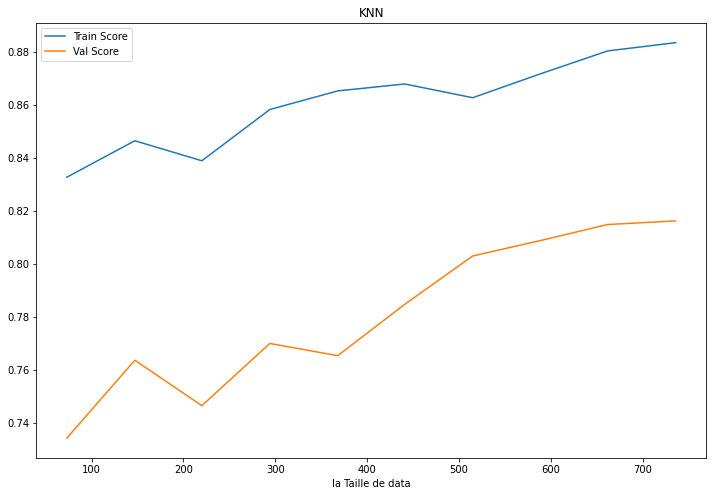

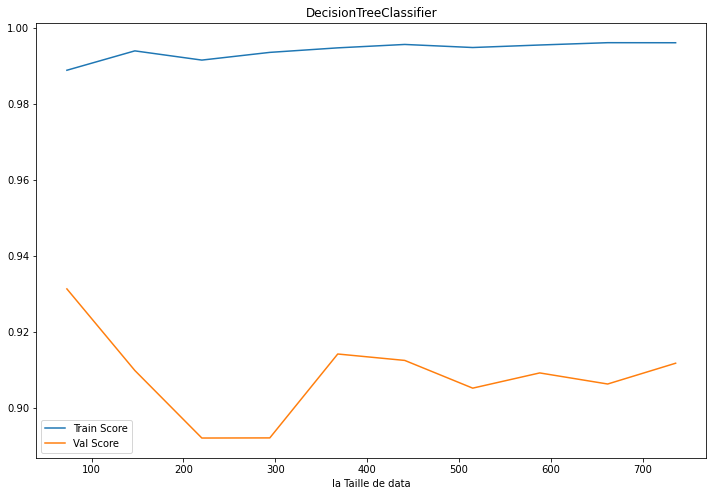

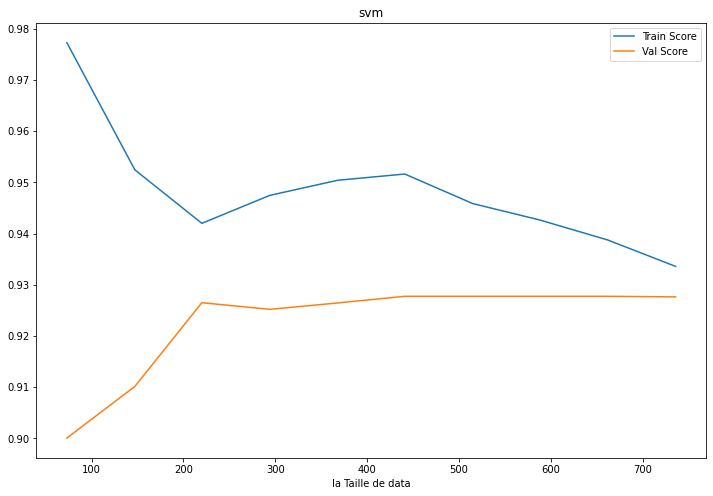

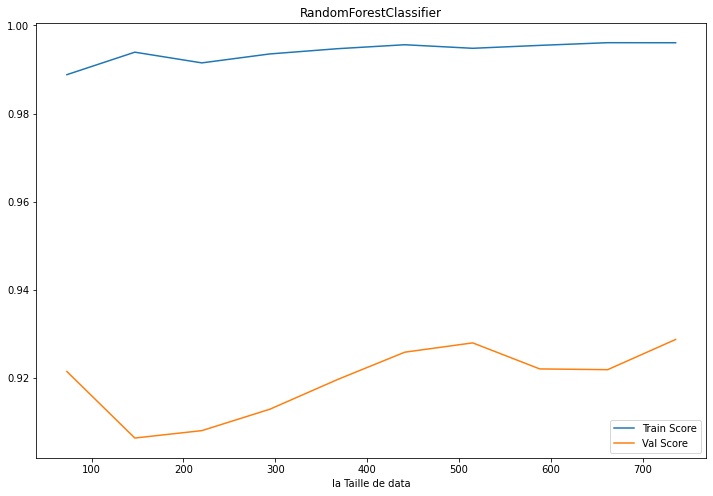

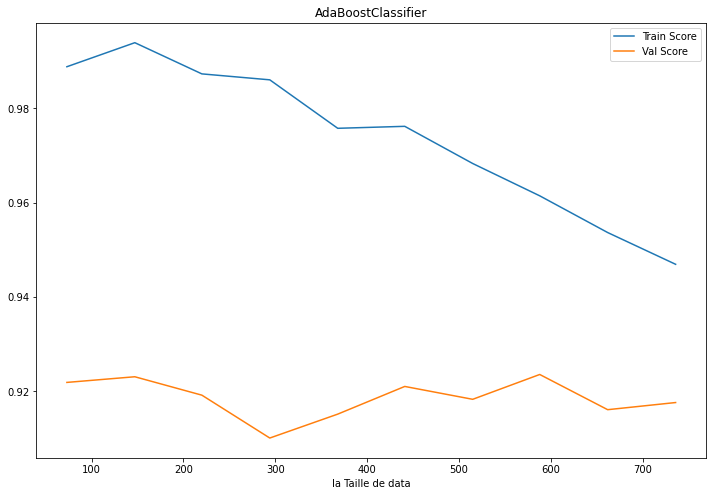

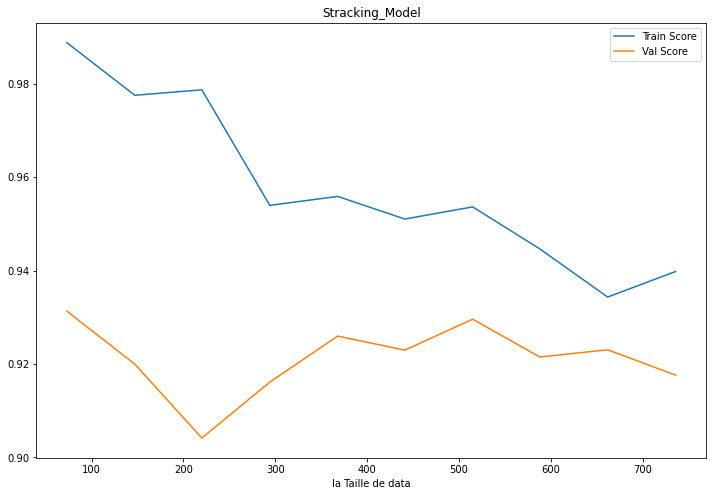

In [99]:
for name,model in list_of_models.items():
  print(name)
  evaluation(model)


# Optimisation

In [106]:
from sklearn.model_selection import GridSearchCV

In [128]:
SVM=make_pipeline(SVC(random_state=10))

In [137]:
hyper_params={
    'svc__gamma':[1e-3,1e-4,1e-5],
    'svc__C':[1,10,100,100],
}

In [138]:
Grid=GridSearchCV(SVM,hyper_params,scoring='recall',cv=4)

Grid.fit(X_train,y_train)

print(Grid.best_params_)
y_pred=Grid.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


{'svc__C': 10, 'svc__gamma': 0.001}
[[204   4]
 [ 20 100]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       208
         1.0       0.96      0.83      0.89       120

    accuracy                           0.93       328
   macro avg       0.94      0.91      0.92       328
weighted avg       0.93      0.93      0.93       328



[[204   4]
 [ 20 100]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       208
         1.0       0.96      0.83      0.89       120

    accuracy                           0.93       328
   macro avg       0.94      0.91      0.92       328
weighted avg       0.93      0.93      0.93       328



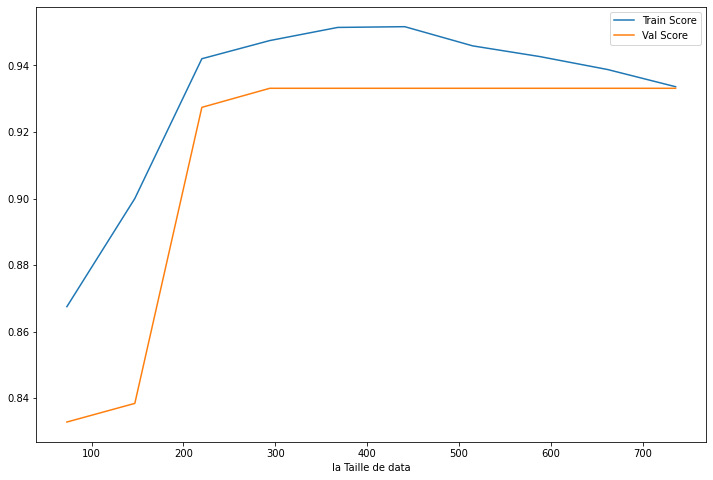

In [139]:
evaluation(Grid.best_estimator_)

#Precision Recall Curve

In [140]:
from sklearn.metrics import precision_recall_curve

In [146]:
precision,recall,threshold=precision_recall_curve(y_test,Grid.best_estimator_.decision_function(X_test))

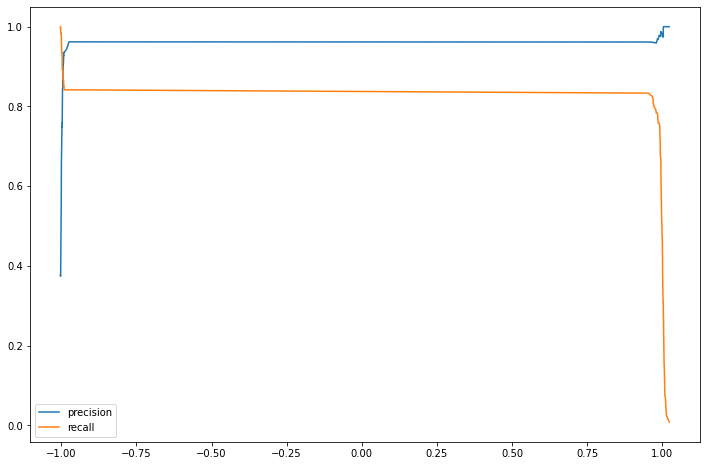

In [150]:
plt.figure(figsize=(12,8))
plt.plot(threshold,precision[:-1],label="precision")
plt.plot(threshold,recall[:-1],label="recall")
plt.legend()

In [151]:
def final_model(model,X,threshold=0):
  return model.decision_function(X)>threshold

In [184]:
y_pred=final_model(Grid.best_estimator_,X_test,-0.5)

In [185]:
from sklearn.metrics import recall_score,accuracy_score,precision_score

In [186]:
accuracy_score(y_test,y_pred)

0.926829268292683

In [187]:
precision_score(y_test,y_pred)

0.9615384615384616

In [188]:
recall_score(y_test,y_pred)

0.8333333333333334

In [189]:
f1_score(y_test,y_pred)

0.8928571428571429